In [2]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle, Polygon
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from functools import reduce
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
import mooringParams.paramsDAFT1 as pd1
import mooringParams.paramsDAFT2 as pd2
import mooringParams.paramsDAFT3 as pd3

In [5]:
etopo1name = '../../ChukchiTimeSeries/data/etopo1_bedrock.asc'
topo_file = open(etopo1name, 'r')
ncols = int(topo_file.readline().split()[1])
nrows = int(topo_file.readline().split()[1])
xllcorner = float(topo_file.readline().split()[1])
yllcorner = float(topo_file.readline().split()[1])
cellsize = float(topo_file.readline().split()[1])
topo_file.close()
dres = 1
etopo = np.loadtxt(etopo1name, skiprows=5)
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
clons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
clats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-500,2251,100) # check etopo.ravel().max()
#lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=cm.terrain)
#olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
#olevels1 = np.concatenate([np.arange(-6000,-1000,1000),np.arange(-250,1,50)])
olevels1 = [-3000,-2000,-1000]
olevels4 = [-100,-40]
#olevels4 = np.concatenate([np.arange(-6000,-1999,100),np.arange(-1500,1,10)])
olevels2 = [0,10000]
olevels3 = [0]
rlons, rlats = (np.meshgrid(clons[:-1],clats[:-1]))
rcParams['contour.negative_linestyle'] = 'solid'

In [74]:
meanADCP['C1_17'][3]

2.0803945

In [85]:
np.array(meanADCP['C1_17'][3])

array(2.0803945, dtype=float32)

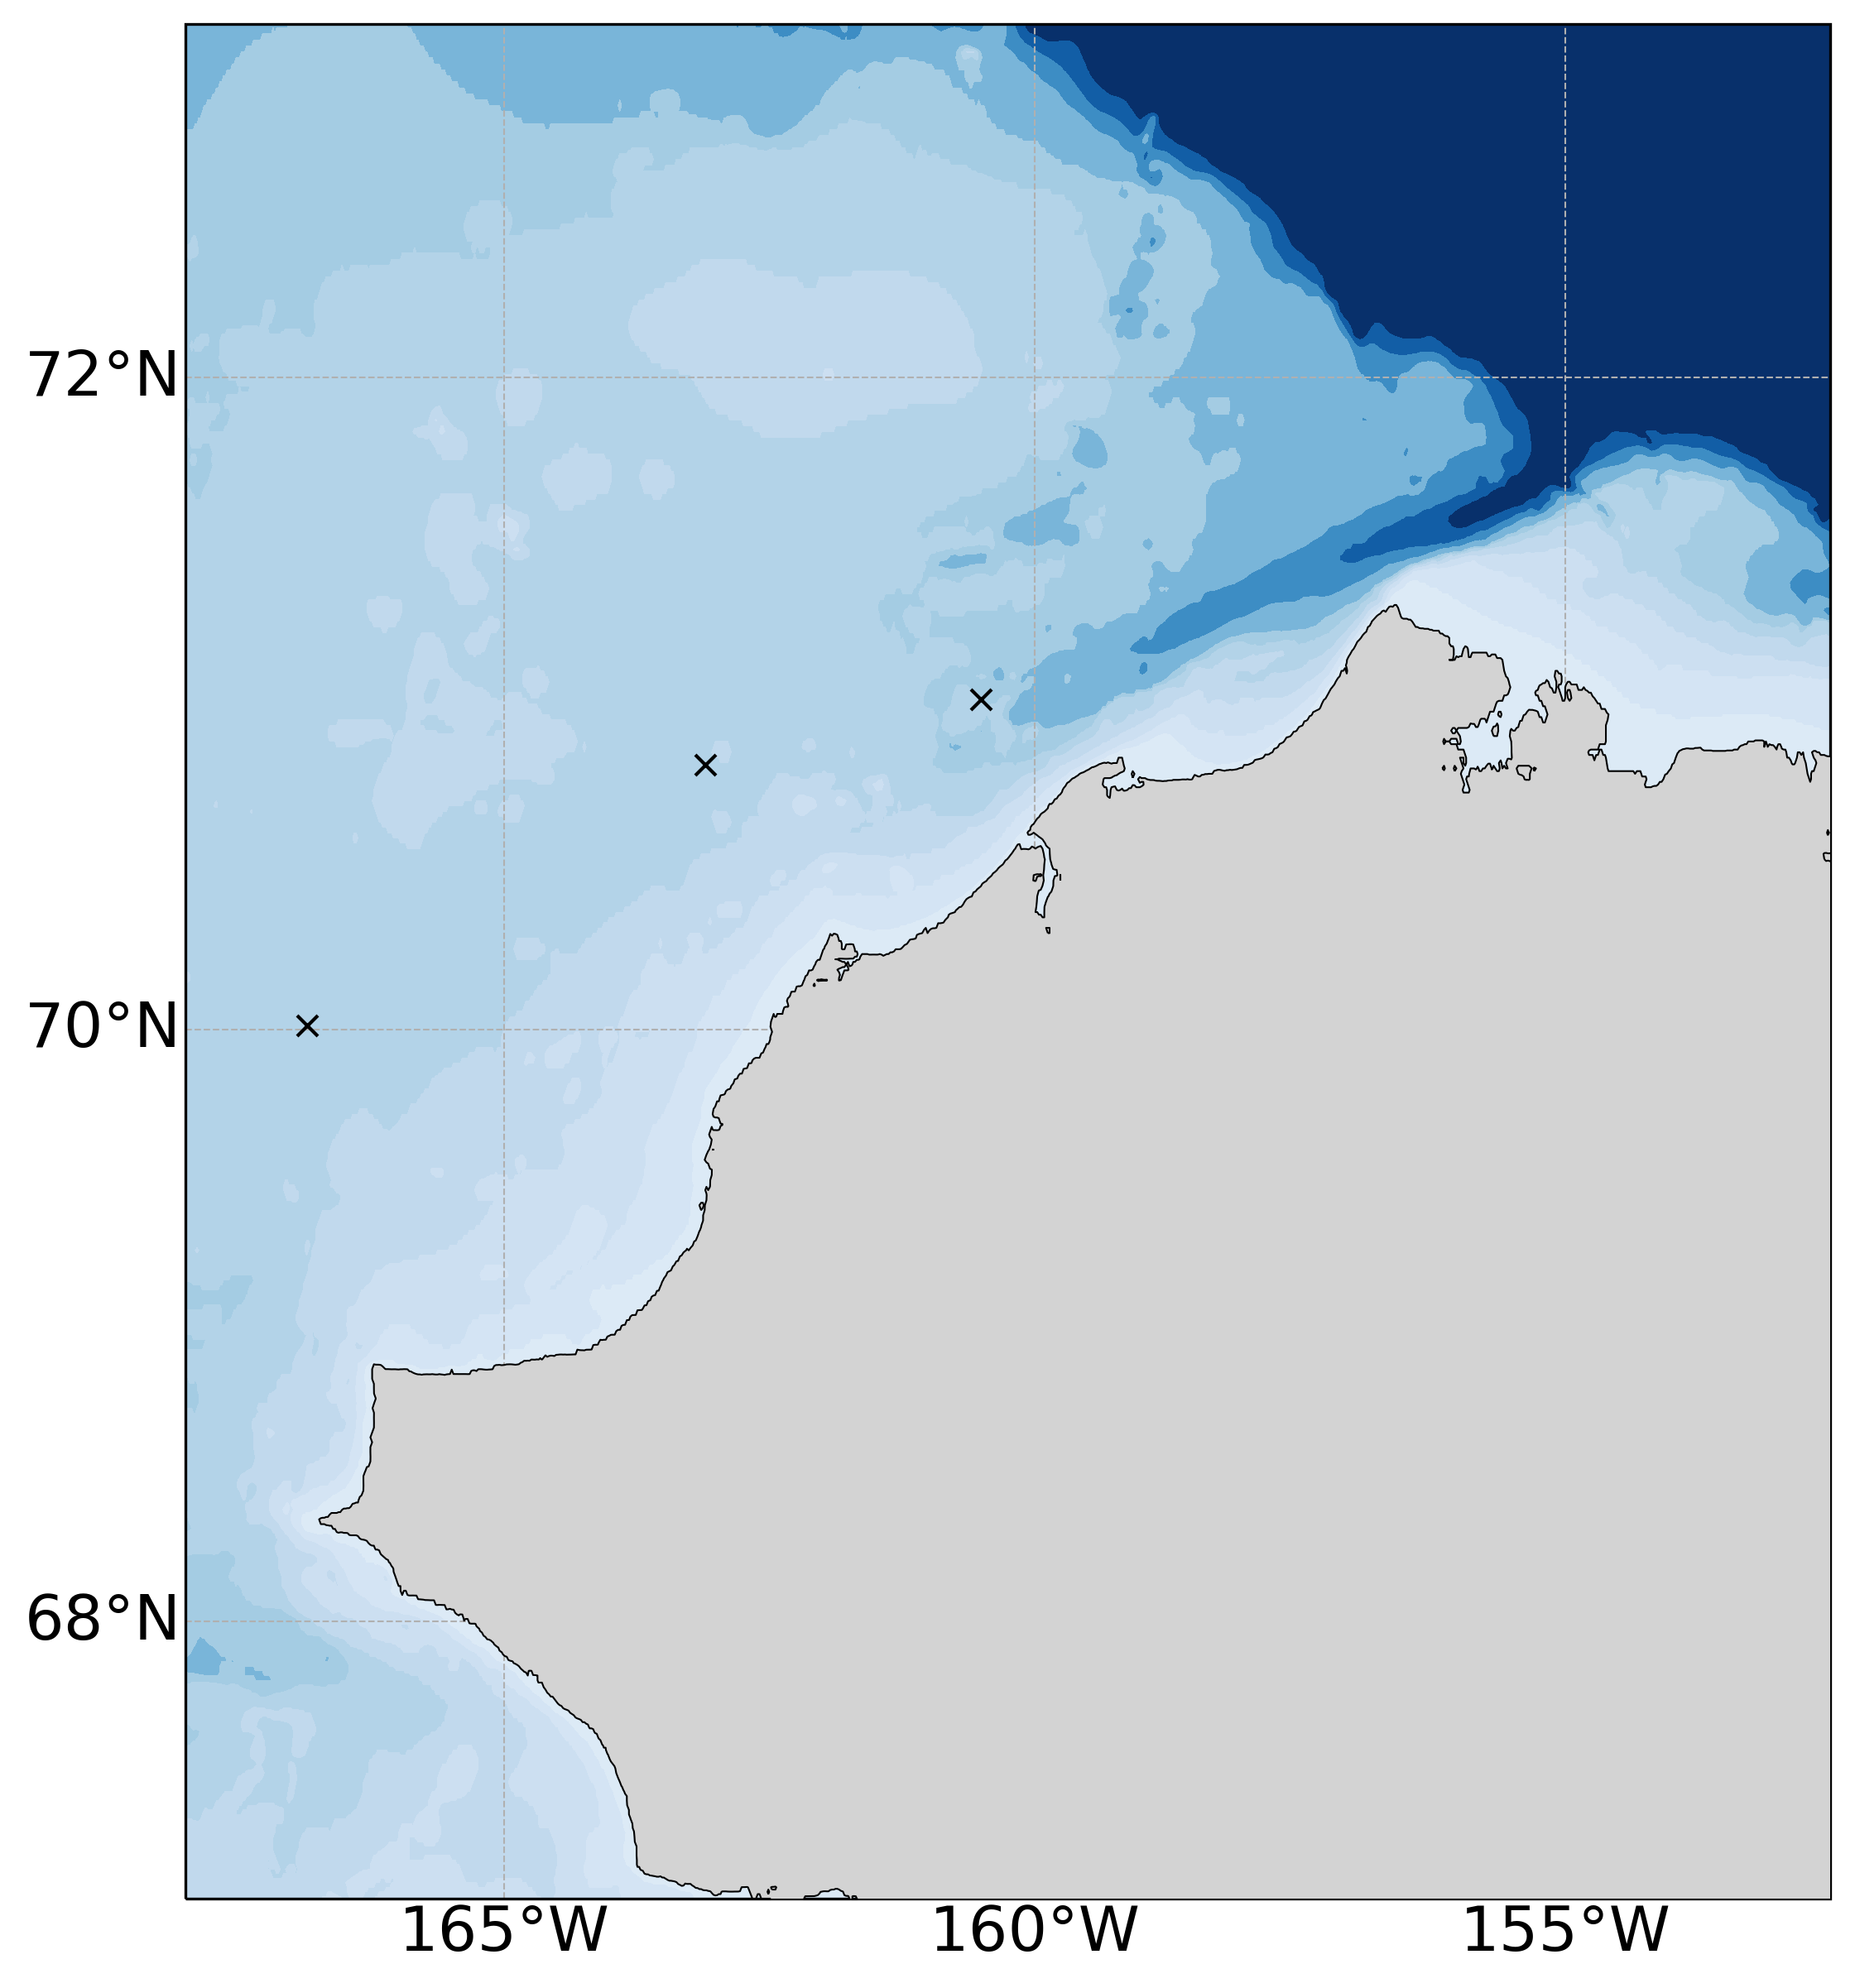

In [108]:
#Look at how much actually overlaps
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import cm
import cmocean 

figure = plt.figure(figsize=(10,10),dpi=300)
ax1=plt.subplot(111,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=1,linewidth=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180,-175,-170,-165,-160,-155,-150,-145,-140])
gl.ylocator = mticker.FixedLocator([53,54,56,58,60,62,64,66,68,70,72,74,75])
gl.xlabel_style = {'size':18}
gl.ylabel_style = {'size':18}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
lfill = ax1.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=5)
ax1.plot(pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],'xk',transform=ccrs.PlateCarree())
ax1.plot(pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],'xk',transform=ccrs.PlateCarree())
ax1.plot(pd3.wbatParams.mooringLoc[1],pd3.wbatParams.mooringLoc[0],'xk',transform=ccrs.PlateCarree())

cso4 = ax1.contour(rlons, rlats, etopo, olevels3, colors ='k',linewidths=.5,transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
pc = plt.contourf(rlons,rlats,etopo, vmin=-200, vmax=25,levels=np.concatenate([[-5000],np.arange(-300,-60,40),np.arange(-60,1,10)]),transform=ccrs.PlateCarree(),cmap=cm.Blues_r)
ax1.set_extent([-168,-152.5,67,73])

In [117]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import metpy.calc as mp
from metpy.units import units
import matplotlib.cm as cm

def pmelRead(file):
    ds = xr.open_dataset(file,decode_times=False)
    times = ds.time.values+ds.time2.values/1000/60/60/24
    t2 = [Time(time,format='jd').iso for time in times]
    ds['time3'] = pd.to_datetime(t2)
    ds = ds.where(ds.v_1206<1000)
    #plt.plot(ds.time3,np.cumsum(np.ravel(ds.sel(depth=20).v_1206)))
    #plt.ylim(-10000,100000)
    return ds.sel(depth=24)
        
C1_17 = pmelRead('../data/physicalData/PMEL_2017_17ckp1a_wcp_vel.nc')
C1_18 =  pmelRead('../data/physicalData/PMEL_2018_18ckp1a_wcp_vel.nc')
C11_17 =  pmelRead('../data/physicalData/PMEL_2017_17ckp11a_wcp_vel.nc')
C11_18 =  pmelRead('../data/physicalData/PMEL_2018_18ckp11a_wcp_vel.nc')
C4_18 =  pmelRead('../data/physicalData/PMEL_2018_18ckp4a_wcp_vel.nc')

In [61]:
meanADCP = {'C1_17':[pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],
                     mp.wind_direction(np.mean(np.ravel(C1_17.u_1205))*units('cm/s'), np.mean(np.ravel(C1_17.v_1206))*units('cm/s'),convention='to').magnitude-C1_17.attrs['DECLINATION_CORR'],
                      mp.wind_speed(np.mean(np.ravel(C1_17.u_1205))*units('cm/s'), np.mean(np.ravel(C1_17.v_1206))*units('cm/s')).magnitude],
            'C1_18':[pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],
                     mp.wind_direction(np.mean(np.ravel(C1_18.u_1205))*units('cm/s'), np.mean(np.ravel(C1_18.v_1206))*units('cm/s'),convention='to').magnitude-C1_18.attrs['DECLINATION_CORR'],
                      mp.wind_speed(np.mean(np.ravel(C1_18.u_1205))*units('cm/s'), np.mean(np.ravel(C1_18.v_1206))*units('cm/s')).magnitude],
            'C11_17':[pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],
                      mp.wind_direction(np.mean(np.ravel(C11_17.u_1205))*units('cm/s'), np.mean(np.ravel(C11_17.v_1206))*units('cm/s'),convention='to').magnitude-C11_17.attrs['DECLINATION_CORR'],
                      mp.wind_speed(np.mean(np.ravel(C11_17.u_1205))*units('cm/s'), np.mean(np.ravel(C11_17.v_1206))*units('cm/s')).magnitude],
            'C11_18':[pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],
                      mp.wind_direction(np.mean(np.ravel(C11_18.u_1205))*units('cm/s'), np.mean(np.ravel(C11_18.v_1206))*units('cm/s'),convention='to').magnitude-C11_18.attrs['DECLINATION_CORR'],
                      mp.wind_speed(np.mean(np.ravel(C11_18.u_1205))*units('cm/s'), np.mean(np.ravel(C11_18.v_1206))*units('cm/s')).magnitude],
            'C4_18':[pd3.wbatParams.mooringLoc[1],pd3.wbatParams.mooringLoc[0],
                     mp.wind_direction(np.mean(np.ravel(C4_18.u_1205))*units('cm/s'), np.mean(np.ravel(C4_18.v_1206))*units('cm/s'),convention='to').magnitude-C4_18.attrs['DECLINATION_CORR'],
                      mp.wind_speed(np.mean(np.ravel(C4_18.u_1205))*units('cm/s'), np.mean(np.ravel(C4_18.v_1206))*units('cm/s')).magnitude]}

In [115]:
meanADCP = {'C1_17':[pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],
                     np.mean(np.ravel(C1_17.u_1205)), np.mean(np.ravel(C1_17.v_1206))],
            'C1_18':[pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],
                     np.mean(np.ravel(C1_18.u_1205)), np.mean(np.ravel(C1_18.v_1206))],
            'C11_17':[pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],
                      np.mean(np.ravel(C11_17.u_1205)), np.mean(np.ravel(C11_17.v_1206))],
            'C11_18':[pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],
                      np.mean(np.ravel(C11_18.u_1205)), np.mean(np.ravel(C11_18.v_1206))],
            'C4_18':[pd3.wbatParams.mooringLoc[1],pd3.wbatParams.mooringLoc[0],
                     np.mean(np.ravel(C4_18.u_1205)), np.mean(np.ravel(C4_18.v_1206))]}

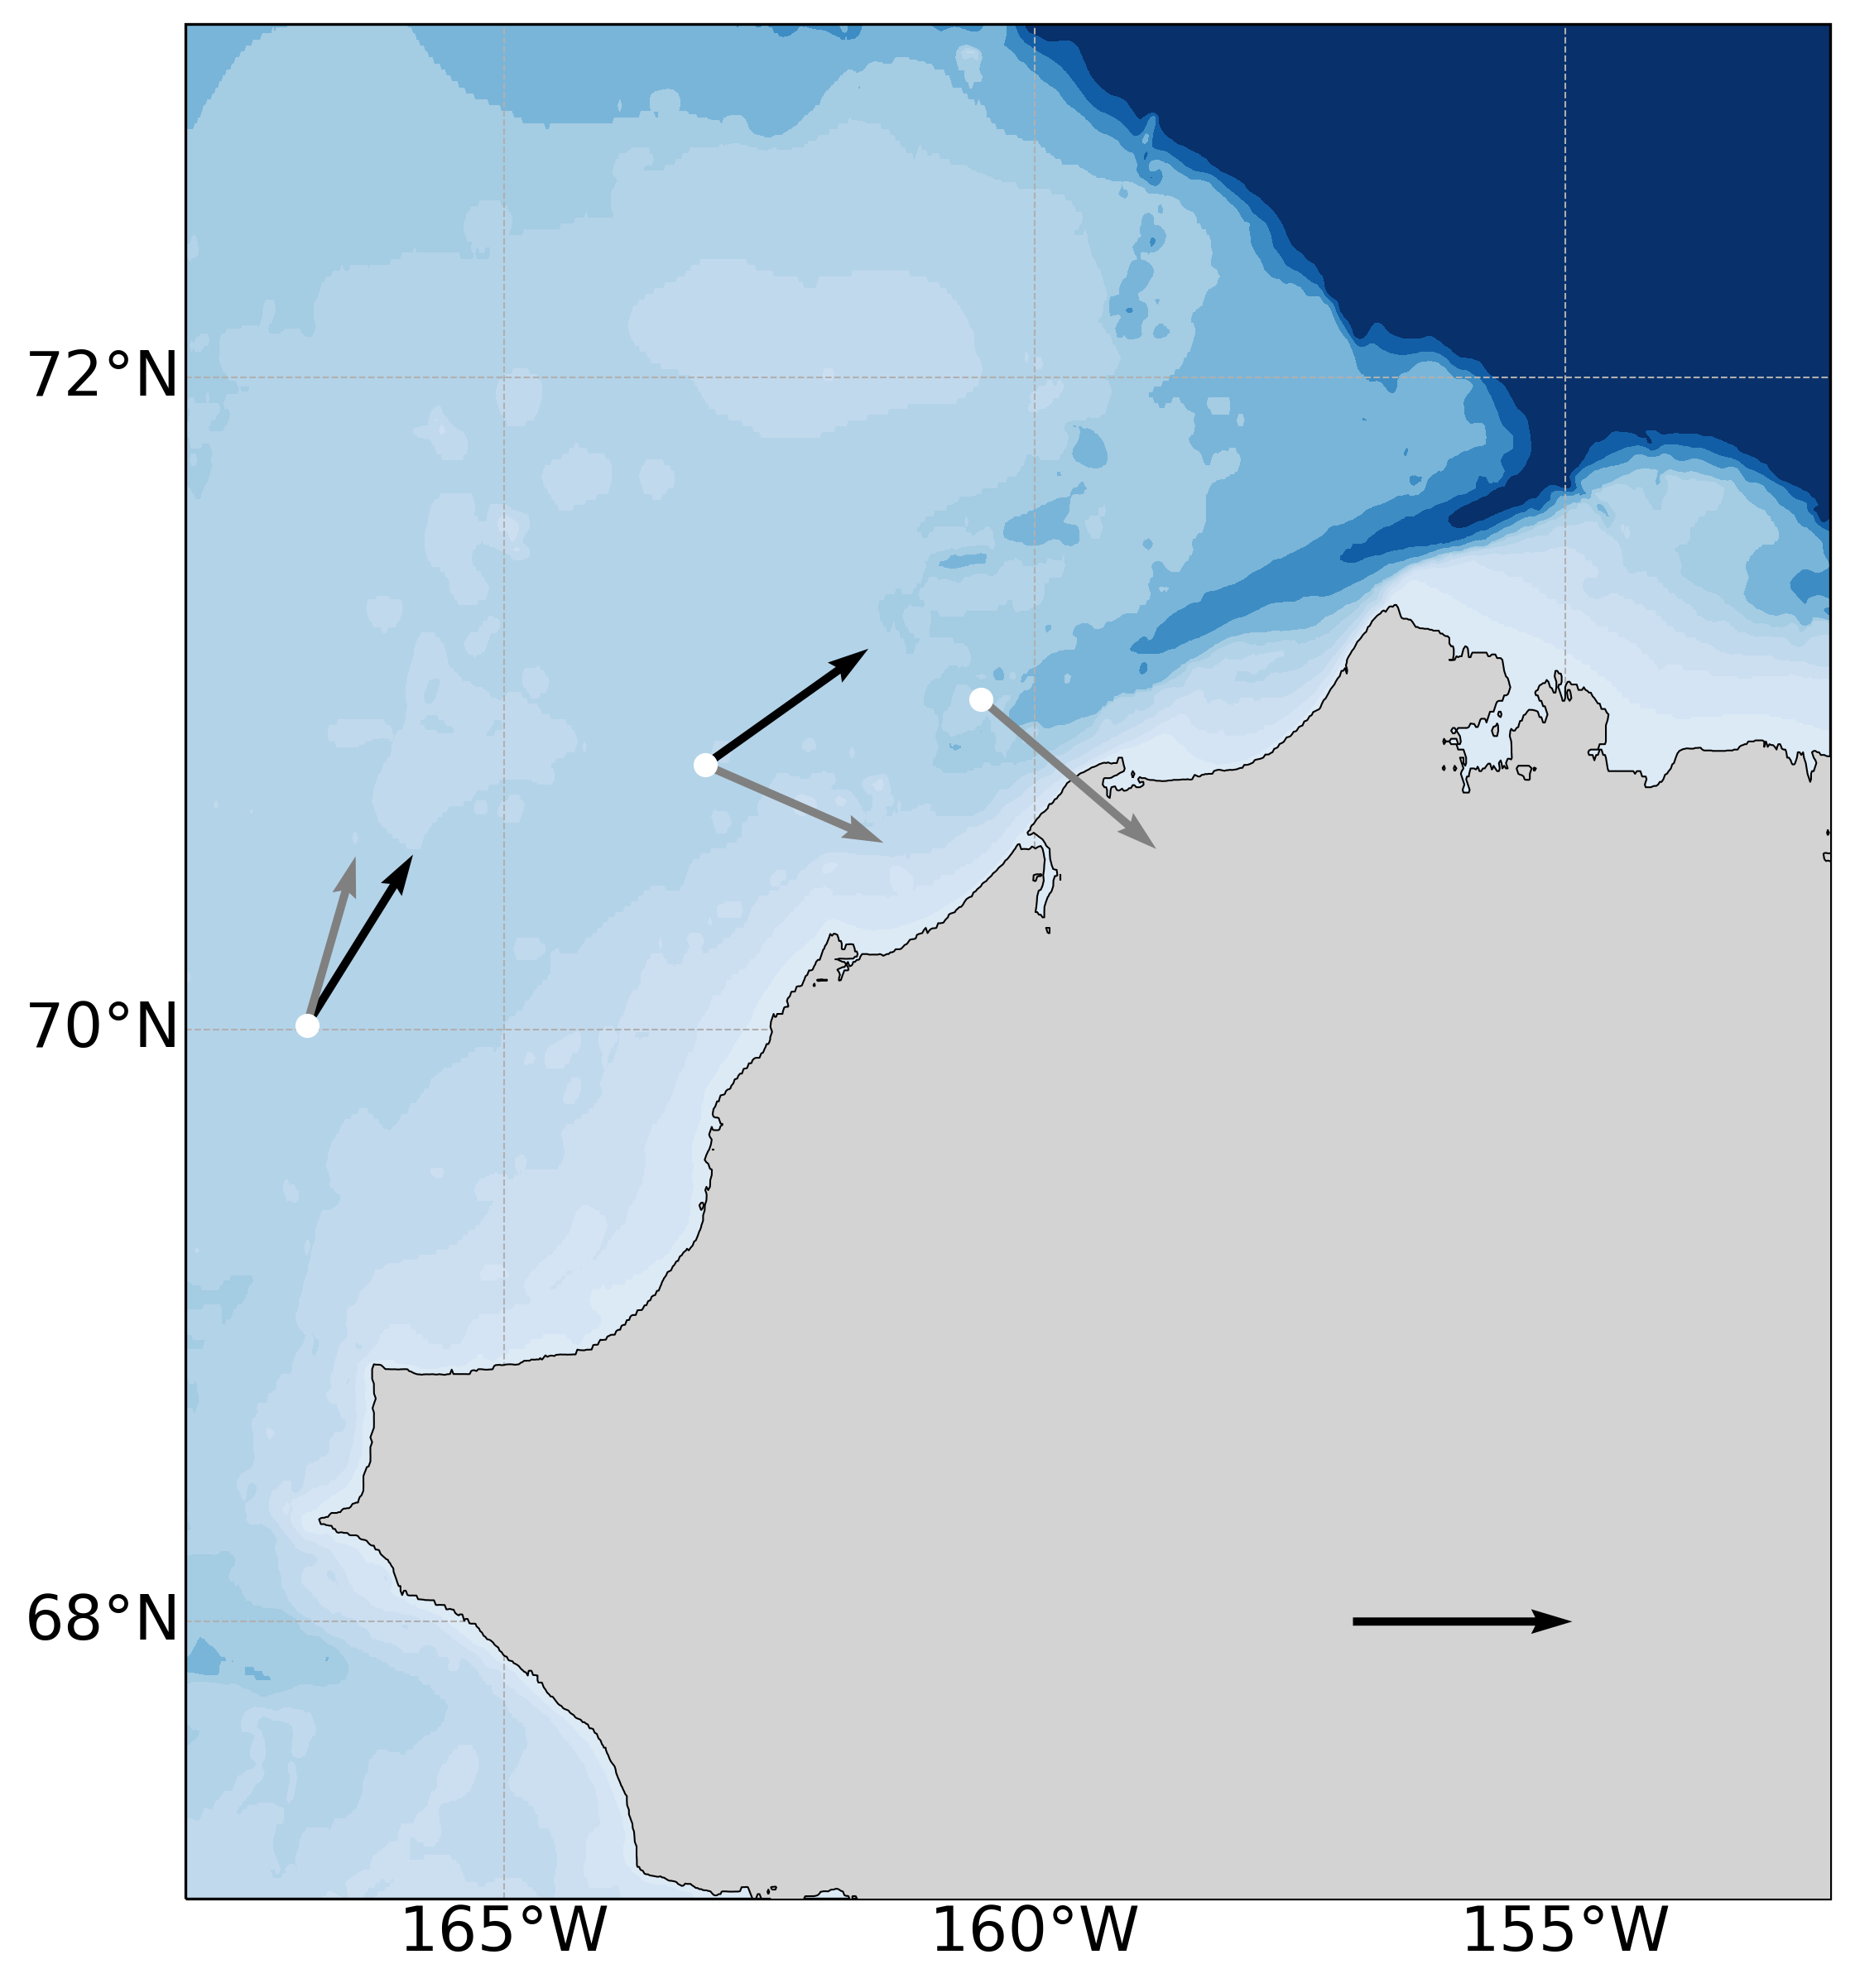

In [138]:
#Look at how much actually overlaps
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import cm
import cmocean 

figure = plt.figure(figsize=(10,10),dpi=300)
ax1=plt.subplot(111,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=1,linewidth=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180,-175,-170,-165,-160,-155,-150,-145,-140])
gl.ylocator = mticker.FixedLocator([53,54,56,58,60,62,64,66,68,70,72,74,75])
gl.xlabel_style = {'size':18}
gl.ylabel_style = {'size':18}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
lfill = ax1.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=5)
ax1.plot(pd1.wbatParams.mooringLoc[1],pd1.wbatParams.mooringLoc[0],'ow',transform=ccrs.PlateCarree(),zorder=7)
ax1.plot(pd2.wbatParams.mooringLoc[1],pd2.wbatParams.mooringLoc[0],'ow',transform=ccrs.PlateCarree(),zorder=7)
ax1.plot(pd3.wbatParams.mooringLoc[1],pd3.wbatParams.mooringLoc[0],'ow',transform=ccrs.PlateCarree(),zorder=7)

cso4 = ax1.contour(rlons, rlats, etopo, olevels3, colors ='k',linewidths=.5,transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
pc = plt.contourf(rlons,rlats,etopo, vmin=-200, vmax=25,levels=np.concatenate([[-5000],np.arange(-300,-60,40),np.arange(-60,1,10)]),transform=ccrs.PlateCarree(),cmap=cm.Blues_r)
ax1.set_extent([-168,-152.5,67,73])
a = plt.quiver(np.array([meanADCP['C1_17'][0]]),np.array([meanADCP['C1_17'][1]]),np.array([meanADCP['C1_17'][2]]),np.array([meanADCP['C1_17'][3]]), color='black', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)
a = plt.quiver(np.array([meanADCP['C1_18'][0]]),np.array([meanADCP['C1_18'][1]]),np.array([meanADCP['C1_18'][2]]),np.array([meanADCP['C1_18'][3]]), color='grey', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)
a = plt.quiver(np.array([meanADCP['C11_17'][0]]),np.array([meanADCP['C11_17'][1]]),np.array([meanADCP['C11_17'][2]]),np.array([meanADCP['C11_17'][3]]), color='black', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)
a = plt.quiver(np.array([meanADCP['C11_18'][0]]),np.array([meanADCP['C11_18'][1]]),np.array([meanADCP['C11_18'][2]]),np.array([meanADCP['C11_18'][3]]), color='grey', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)
a = plt.quiver(np.array([meanADCP['C4_18'][0]]),np.array([meanADCP['C4_18'][1]]),np.array([meanADCP['C4_18'][2]]),np.array([meanADCP['C4_18'][3]]), color='grey', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)
a = plt.quiver(np.array([-157]),np.array([68]),np.array([10]),np.array([0]), color='black', scale=75,width=.005,transform=ccrs.PlateCarree(),zorder=6)